In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")

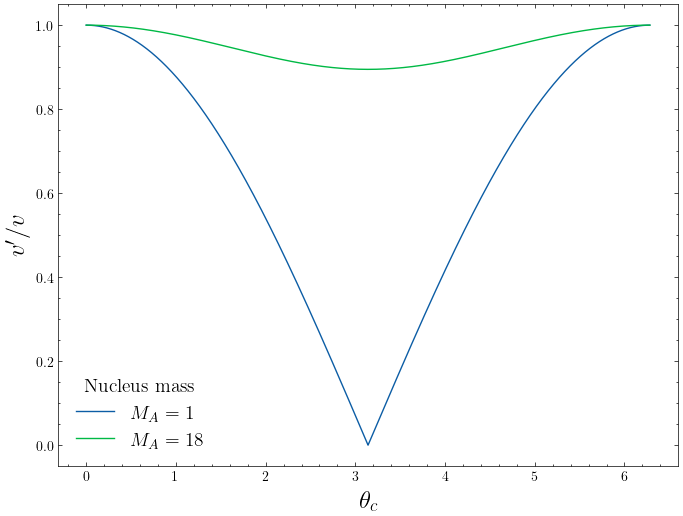

In [3]:
import numpy as np



class NeutronColision:
    def __init__(self, M, theta):
        self.theta = theta
        self.theta_lab = self.angle_to_lab()
        self.M = M
        
    def new_velocity(self) -> list:
        alpha = (self.M-1)**2 / (self.M+1)**2
        return np.sqrt( ((1+alpha)+(1-alpha)*np.cos(self.theta))/2)

    def angle_to_lab(self):
        return np.arctan(np.sin(self.theta) / ((1/M) + np.cos(self.theta)))
    
    def xi(self):
        if self.M == 1:
            return 1
        else:
            return 1 - (((self.M-1)**2)/(2*self.M))*np.log((self.M+1)/(self.M-1))

plt.figure(figsize=(8,6))
for M in [1, 18]:
    angles_cm = [theta for theta in np.arange(0, 2*np.pi, 0.0001)]
    colisions = [NeutronColision(M, angle) for angle in angles_cm]
    scattter_velocities = [colision.new_velocity() for colision in colisions]
    plt.plot(angles_cm, scattter_velocities, label = rf"$M_A = {M}$")

plt.legend(title="Nucleus mass", fontsize=14, title_fontsize=14)
plt.ylabel("$v'/v$", fontsize=18)
plt.xlabel(r"$\theta_c$", fontsize=18)
plt.show()

In [4]:
M_avg =1
xis = []
masses = [mass for mass in range(1, 21)]
for mass in masses:
    collision = NeutronColision(mass, 1)
    xis.append(collision.log_energy_loss())

plt.figure(figsize=(8,6))
plt.plot(masses, xis)
plt.xlabel(r"$M_A$", fontsize=16)
plt.ylabel(r"$\xi$", fontsize=18)
plt.xlim(1, 21)
plt.show()

AttributeError: 'NeutronColision' object has no attribute 'log_energy_loss'

0.39851904108451414


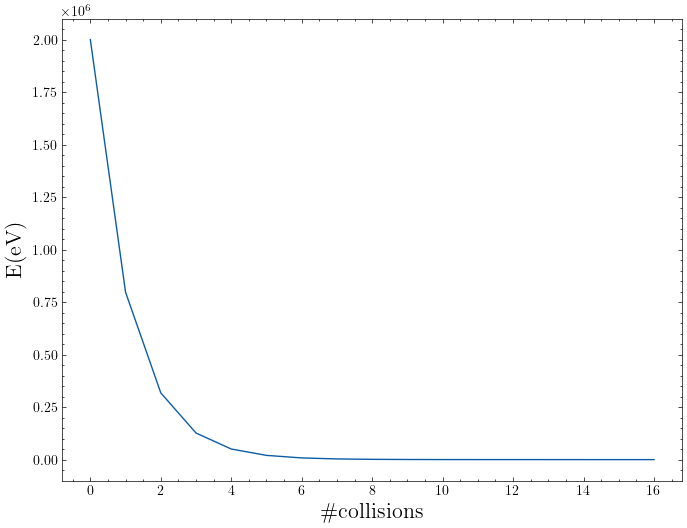

In [5]:
collision = NeutronColision(M=1, theta=1)
frac = 1/np.exp(0.920)
print(frac)
E=2*10**6
energies = [E]
for _ in range(16):
    E*=frac
    energies.append(E)
    
plt.figure(figsize =(8, 6))
plt.plot(energies)
plt.ylabel(r"$\text{E(eV)}$", fontsize=16)
plt.xlabel(r"$\#\text{collisions}$", fontsize=16)
plt.show()

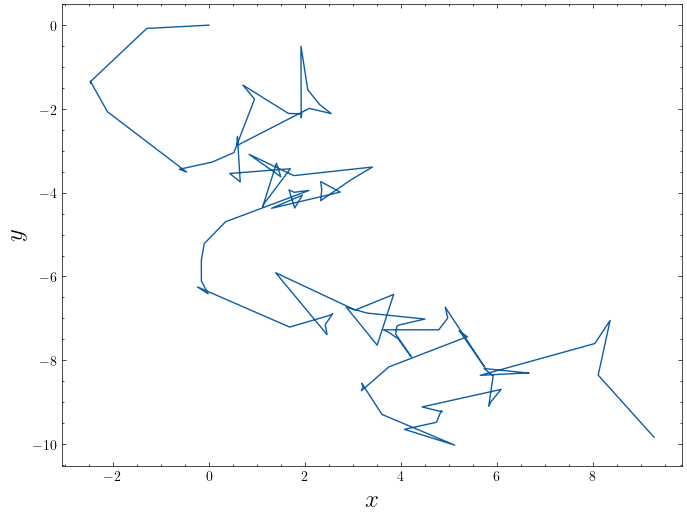

[array([0., 0.]), array([-1.29665559, -0.0785846 ]), array([-2.47023942, -1.34851552]), array([-2.46398627, -1.38485761]), array([-2.47303432, -1.3378767 ]), array([-2.11498884, -2.0681678 ]), array([-0.4681779 , -3.50571993]), array([-0.61823235, -3.44085608]), array([ 0.0651642 , -3.26975033]), array([ 0.51978031, -3.04249734]), array([ 0.94987057, -1.76658609]), array([ 0.70632515, -1.42996482]), array([ 1.65444782, -2.10701635]), array([ 1.9235603 , -2.11912424]), array([ 1.93507988, -2.10859209]), array([ 1.92211568, -2.21172178]), array([ 1.91780542, -0.505629  ]), array([ 2.05984959, -1.54326068]), array([ 2.30823295, -1.8977882 ]), array([ 2.54677681, -2.11090989]), array([ 2.09292707, -1.98710736]), array([ 0.58344001, -2.87458247]), array([ 0.59278813, -2.66365717]), array([ 0.65145792, -3.74348816]), array([ 0.43342672, -3.54124111]), array([ 1.69766483, -3.42829244]), array([ 1.15085248, -4.25698451]), array([ 1.12077556, -4.33230929]), array([ 1.40672411, -3.29564729]), ar

In [7]:
from collision import Neutron

neutron = Neutron(r0 =np.array([0.0, 0.0]))
positions = neutron.walk(100)



plt.figure(figsize=(8, 6))
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.plot(list(zip(*positions))[0], list(zip(*positions))[1])
plt.show()
